In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.models import resnet50
from torch.utils.data import DataLoader, Subset
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [3]:
train_dataset = ImageFolder(root="data/real/imagenette/train", transform=transform)
val_dataset = ImageFolder(root="data/real/imagenette/val", transform=transform)

In [4]:
#class_indices = [0, 1, 2]
#indices = [i for i, (_, label) in enumerate(dataset) if label in class_indices]
#dataset = Subset(dataset, indices)

In [5]:
#train_size = int(0.8 * len(dataset))
#val_size = len(dataset) - train_size
#train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

In [6]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [7]:
model = resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 3)
model = model.to(device)

/Users/kash/miniconda/envs/cva3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/kash/miniconda/envs/cva3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [9]:
num_epochs = 10
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []


In [10]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(100. * correct_train / total_train)
    
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100. * correct_val / total_val)
    
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.2f}%")
    print(f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.2f}%")

Epoch 1/10
Train Loss: 0.2068, Train Acc: 93.69%
Val Loss: 0.4499, Val Acc: 89.61%
Epoch 2/10
Train Loss: 0.1565, Train Acc: 94.45%
Val Loss: 0.1391, Val Acc: 94.76%
Epoch 3/10
Train Loss: 0.0840, Train Acc: 97.33%
Val Loss: 0.1009, Val Acc: 96.65%
Epoch 4/10
Train Loss: 0.1293, Train Acc: 96.64%
Val Loss: 0.0915, Val Acc: 97.25%
Epoch 5/10
Train Loss: 0.1124, Train Acc: 96.60%
Val Loss: 0.0918, Val Acc: 97.00%
Epoch 6/10
Train Loss: 0.0660, Train Acc: 98.82%
Val Loss: 0.1127, Val Acc: 96.31%
Epoch 7/10
Train Loss: 0.0606, Train Acc: 97.85%
Val Loss: 0.0721, Val Acc: 97.60%
Epoch 8/10
Train Loss: 0.0566, Train Acc: 98.23%
Val Loss: 0.2618, Val Acc: 92.10%
Epoch 9/10
Train Loss: 0.0588, Train Acc: 97.85%
Val Loss: 0.0626, Val Acc: 98.11%
Epoch 10/10
Train Loss: 0.0222, Train Acc: 99.41%
Val Loss: 0.0720, Val Acc: 97.42%


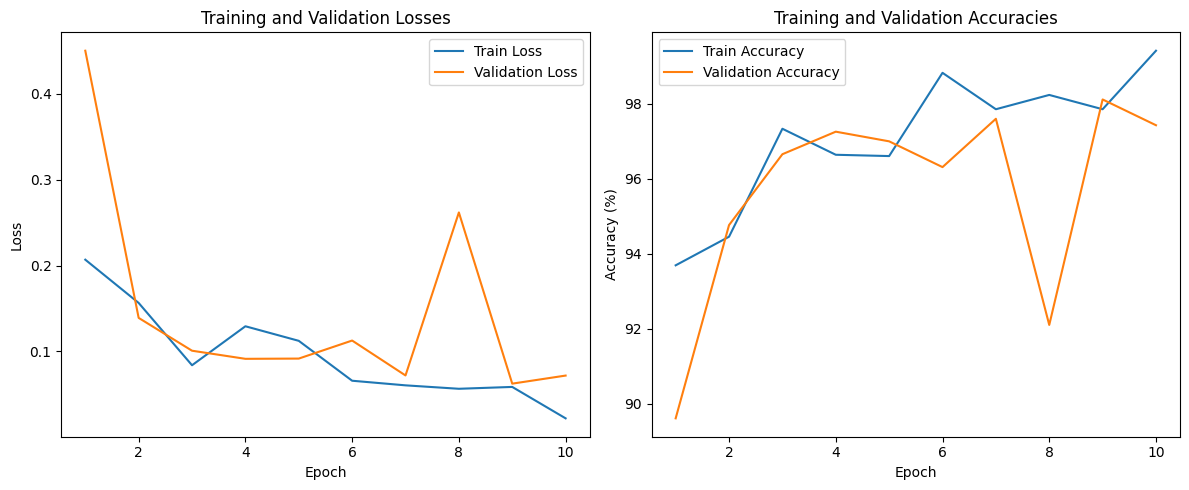

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracies')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
print(device)

mps
